## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import hashlib

## PCA + Classification

Loading and preparing the 8x8 MNIST digits dataset...
Data split: 1437 training samples, 360 testing samples.

Processing for n_components = 2...
  k=5: Accuracy = 0.6111
  k=25: Accuracy = 0.6333
  k=50: Accuracy = 0.6361
  k=100: Accuracy = 0.6250

Processing for n_components = 5...
  k=5: Accuracy = 0.9278
  k=25: Accuracy = 0.9194
  k=50: Accuracy = 0.8861
  k=100: Accuracy = 0.8361

Processing for n_components = 10...
  k=5: Accuracy = 0.9583
  k=25: Accuracy = 0.9417
  k=50: Accuracy = 0.9167
  k=100: Accuracy = 0.8972

Processing for n_components = 20...
  k=5: Accuracy = 0.9861
  k=25: Accuracy = 0.9611
  k=50: Accuracy = 0.9333
  k=100: Accuracy = 0.9111

Processing for n_components = 30...
  k=5: Accuracy = 0.9806
  k=25: Accuracy = 0.9611
  k=50: Accuracy = 0.9306
  k=100: Accuracy = 0.9056

Processing for n_components = 40...
  k=5: Accuracy = 0.9833
  k=25: Accuracy = 0.9583
  k=50: Accuracy = 0.9333
  k=100: Accuracy = 0.9111

Processing for n_components = 50...
  k=5: Ac

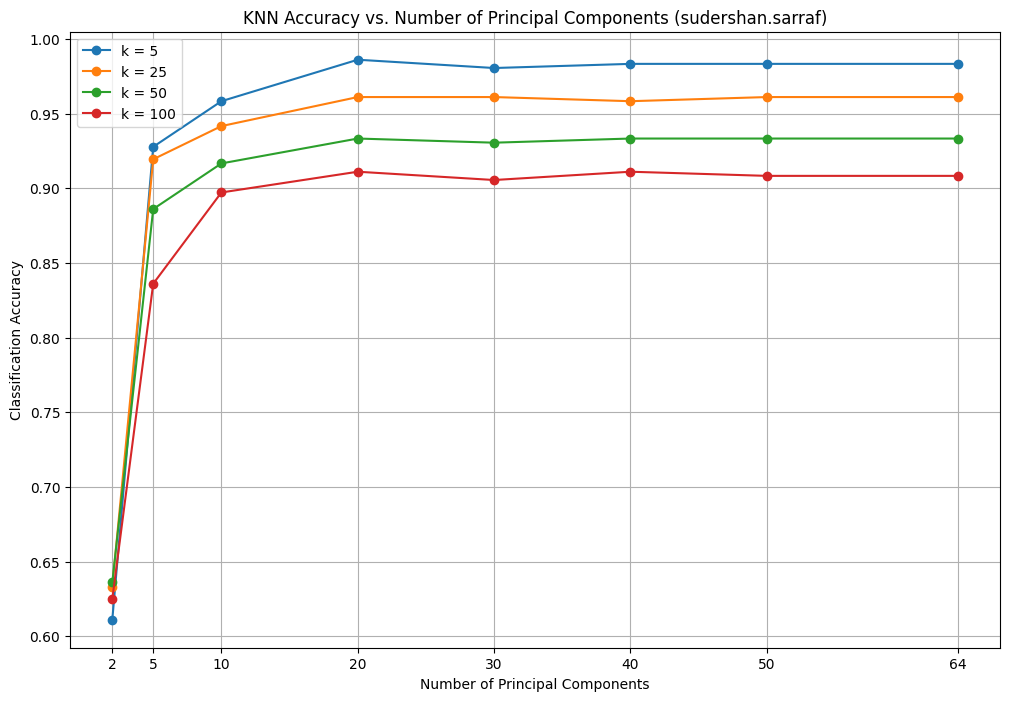

In [2]:
# Configuration
username = "sudershan.sarraf"
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
np.random.seed(seed)

# Q6.1 Reusing the custom PCA class from Q5
class PCA:
    """A custom class to perform Principal Component Analysis."""
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean_vector = None
        self.components = None

    def fit(self, X):
        """Computes the principal components from the training data."""
        self.mean_vector = np.mean(X, axis=0)
        X_centered = X - self.mean_vector
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        self.components = eigenvectors[:, :self.n_components]
        return self

    def transform(self, X):
        """Projects the data onto the principal components."""
        X_centered = X - self.mean_vector
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        """Fits the model and then transforms the data."""
        self.fit(X)
        return self.transform(X)

# Q6.2 Data Loading and Preparation
print("Loading and preparing the 8x8 MNIST digits dataset...")
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# Q6.3 Dimensionality Reduction and Classification
n_components_list = [2, 5, 10, 20, 30, 40, 50, 64]
k_values = [5, 25, 50, 100]
results = {}

for n_components in n_components_list:
    print(f"\nProcessing for n_components = {n_components}...")
    pca = PCA(n_components=n_components)
    
    # Fit PCA on the training data and transform both train and test sets.
    X_train_transformed = pca.fit_transform(X_train)
    X_test_transformed = pca.transform(X_test)

    for k in k_values:
        # Train and evaluate a KNN classifier.
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_transformed, y_train)
        y_pred = knn.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, y_pred)
        results[(n_components, k)] = accuracy
        print(f"  k={k}: Accuracy = {accuracy:.4f}")

# Q6.4 Visualization and Analysis
plt.figure(figsize=(12, 8))
for k in k_values:
    # Collect accuracies for the current k value across all component dimensions.
    accuracies = [results[(n, k)] for n in n_components_list]
    plt.plot(n_components_list, accuracies, marker='o', label=f'k = {k}')

plt.title(f'KNN Accuracy vs. Number of Principal Components ({username})')
plt.xlabel('Number of Principal Components')
plt.ylabel('Classification Accuracy')
plt.xticks(n_components_list)
plt.legend()
plt.grid(True)
plt.show()


# Question 6: PCA + Classification Observations
## Effect of PCA Components
The plot clearly shows that as the number of principal components increases from 2 up to about 20, the classification accuracy rises sharply for all values of k. This indicates that these initial components capture the most significant variance and information needed to distinguish between the digits. Beyond 20 components, the accuracy continues to improve but at a much slower rate, eventually leveling off. This demonstrates a point of diminishing returns, where adding more components provides only marginal gains in performance while increasing computational complexity. The "sweet spot" for this dataset appears to be between 10 and 30 components, as this range offers a good balance between high accuracy and dimensionality reduction.

## Effect of k (Number of Neighbors)
The choice of k also has a noticeable impact on performance. Lower values of k (such as 5 and 10) consistently yield higher classification accuracy across all numbers of principal components compared to larger values like 50 or 100. This suggests that the local neighborhood of a data point is a strong indicator of its class, and considering too many neighbors (larger k) can introduce noise and reduce the classifier's effectiveness. As the number of components increases, the performance gap between the different k values narrows, but the trend of smaller k being better remains.